<a href="https://colab.research.google.com/github/yesalgado/Archivos_CSV/blob/main/Cuadernos_de_trabajo/UNI_Tarea_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

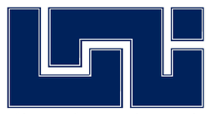

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

Tellez Salgado, Yesner Alexander
~~~Python
Apellidos, y Nombres
~~~

# **Tarea Modelos Supervisados**

## **Modelo de Regresión**



##Instalando las librerías necesarias..

###Carga de librerías necesarias

###Analisis de datos

In [1]:
import pandas as pd 
import numpy as np

##Modelo y preprocesamiento

In [2]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
import multiprocessing

###Graficos

In [3]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import plotly as px
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from math import sqrt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('once')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



##Obtención de los Datos

Heart Attack Analysis & Prediction Dataset

Dataset have 15 columns

**Age :** Age of the patient

**Sex :** Sex of the patient

**exang:** exercise induced angina (1 = yes; 0 = no)

**ca:** number of major vessels (0-3)

**cp :** Chest Pain type chest pain type

*Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic*
trtbps : resting blood pressure (in mm Hg)

**chol :** cholestoral in mg/dl fetched via BMI sensor

**fbs :** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg :** resting electrocardiographic results

*Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria*

**thalach :** maximum heart rate achieved

**target :** 0= less chance of heart attack 1= more chance of heart attack


Link: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [4]:
url = "https://raw.githubusercontent.com/yesalgado/Archivos_CSV/main/"

In [5]:
archivo = "heart.csv"

In [6]:
df = pd.read_csv(url+archivo)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df = pd.get_dummies(df, drop_first = True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...

##División del conjunto de datos

In [9]:
x = df.iloc[:,[3,4,5,6,7,8,9,10,11,12]]
y = df.iloc[:,2:-11]

Se ha descartado la variable output, puesto que esta es la que nos indica si el paciente recurre a un dolor en el pecho.

In [10]:
x

,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,145,233,1,0,150,0,2.3,0,0,1
1,130,250,0,1,187,0,3.5,0,0,2
2,130,204,0,0,172,0,1.4,2,0,2
3,120,236,0,1,178,0,0.8,2,0,2
4,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...
298,140,241,0,1,123,1,0.2,1,0,3
299,110,264,0,1,132,0,1.2,1,0,3
300,144,193,1,1,141,0,3.4,1,2,3
301,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

,cp
0,3
1,2
2,1
3,1
4,0
...,...
298,0
299,3
300,0
301,0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [13]:
x_train.shape

(227, 10)

In [14]:
x_test.shape

(76, 10)

In [15]:
y_train.shape

(227, 1)

In [16]:
y_test.shape

(76, 1)

##**Regresión Lineal**

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test)

In [20]:
print(y_test.values)
print("-----")
print(y_pred)

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [1]
 [3]
 [0]
 [0]
 [3]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [1]
 [2]
 [3]
 [0]
 [2]
 [2]
 [3]
 [0]
 [3]
 [0]
 [0]
 [3]
 [2]
 [2]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [0]
 [3]]
-----
[[ 1.4045569 ]
 [ 1.22848159]
 [ 0.61767832]
 [ 0.26781961]
 [ 1.19329744]
 [ 0.68064953]
 [ 0.33549669]
 [ 0.56687437]
 [ 0.35528396]
 [ 1.21548643]
 [ 0.98577983]
 [ 0.89717181]
 [ 1.3657599 ]
 [ 0.13293211]
 [ 0.75256048]
 [ 1.2253714 ]
 [ 1.41465569]
 [ 0.90290724]
 [ 1.60483644]
 [ 1.32890908]
 [ 1.07786086]
 [ 1.5246169 ]
 [ 0.89418565]
 [ 0.91717734]
 [ 0.54465418]
 [ 1.1751376 ]
 [ 0.12092925]
 [ 1.2325482 ]
 [ 1.00490776]
 [ 1.13211286]
 [ 1.38473628]
 [ 1.34145573]
 [ 1.59286889]
 [ 1.08923736]
 [ 0.43457788]
 [ 0.88804961]
 [ 1.73831743]
 [ 1.18789349]
 [ 1.11324459]
 [ 0.3090067 ]
 [ 1.38121591

##**Metricas**

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

##Error de la media de los cuadrados - MSE

In [22]:
sqrt(mean_squared_error(y_test, y_pred))

0.9981334538097255

##Error de la media absoluta - MAE

In [23]:
metrics.median_absolute_error(y_test, y_pred)

0.8345223963386528

##Coeficiente de determinación ($R^2$)

In [24]:
metrics.r2_score(y_test, y_pred)

0.1285085897375099

##Construcción de la función lineal

In [25]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
lr.coef_

array([[ 0.00838272, -0.00177148,  0.37768399, -0.04573545,  0.00687705,
        -0.65360337,  0.06896446,  0.10247669, -0.09174012, -0.14203129]])

In [27]:
lr.intercept_

array([-0.36959375])

trtbps: 0.00838272 + chol: -0.00177148 +	fbs: 0.37768399 	+ restecg: -0.04573545 + thalachh:  0.00687705 +	exng: -0.65360337	+ oldpeak:  0.06896446	+ slp: 0.10247669 +	caa: -0.09174012 +	thall: 0.14203129 nano: -0.36959375

Hemos observado que la cantidad de dolores en el pecho va a disminuir de manera considerable si el paciente se cuida según recomendaciones adscritas por su cardiologo, con ello determinamos que disminuirian -0.80 segun el tipo de dolor que el paciente presente en su momento. 

##**Random Forest**

In [28]:
rfr = RandomForestRegressor(max_depth = 16, n_estimators = 5)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



##Metricas

###Error de la media de los cuadrados - MSE

In [29]:
sqrt(mean_squared_error(y_test, y_pred))

1.0620238871334793

###Error de la media absoluta - MAE

In [30]:
metrics.median_absolute_error(y_test, y_pred)

0.7999999999999999

###Coeficiente de determinación ($R^2$)

In [31]:
metrics.r2_score(y_test, y_pred)

0.013369680448281351

##Arbol de decisión

In [32]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

##Metricas

###Error de la media de los cuadrados - MSE

In [33]:
sqrt(mean_squared_error(y_test, y_pred))

1.224744871391589

###Error de la media absoluta - MAE

In [34]:
metrics.median_absolute_error(y_test, y_pred)

1.0

###Coeficiente de determinación ($R^2$)

In [35]:
metrics.r2_score(y_test, y_pred)

-0.31213084961381155

##Información del modelo

In [36]:
print(f"Profundidad del árbol: {dtr.get_depth()}")
print(f"Número de nodos terminales: {dtr.get_n_leaves()}")

Profundidad del árbol: 19
Número de nodos terminales: 94


# **Con PyCaret**

In [37]:
pip install pycaret

##Habilitando Google Colab

In [38]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


###Configuración del entorno PyCaret

In [39]:
from pycaret.regression import *

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/local/lib/python3.7/dist-packages/scikitplot/plotters.py:37: DeprecationWarning:

This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/local/lib/python3.7/dist-packages/pycaret/internal/tabular.py:64: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of fr

In [40]:
regresion = setup(data = df, target = "cp", session_id=1)

,Description,Value
0,session_id,1
1,Target,cp
2,Original Data,"(303, 14)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(212, 24)"


In [41]:
mejor_modelo = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6522,0.7372,0.8497,0.2176,0.4409,0.3763,0.429
et,Extra Trees Regressor,0.6244,0.7457,0.8465,0.2132,0.4464,0.3986,0.406
br,Bayesian Ridge,0.7376,0.7965,0.8863,0.1577,0.4655,0.4021,0.012
huber,Huber Regressor,0.7105,0.8038,0.8917,0.1418,0.4563,0.4262,0.038
ridge,Ridge Regression,0.7256,0.8037,0.8914,0.1410,0.4671,0.4098,0.012
omp,Orthogonal Matching Pursuit,0.7367,0.8236,0.9020,0.1203,0.4698,0.4371,0.013
lr,Linear Regression,0.7323,0.8267,0.9039,0.1159,0.4737,0.4137,0.273
lar,Least Angle Regression,0.7323,0.8267,0.9039,0.1159,0.4737,0.4137,0.015
gbr,Gradient Boosting Regressor,0.7235,0.8328,0.9048,0.0828,0.4822,0.3931,0.058
ada,AdaBoost Regressor,0.7974,0.8621,0.9216,0.0817,0.5009,0.3709,0.074


In [42]:
predict_model(mejor_modelo, data=df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2.22
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.72
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.30
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.15
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.00
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.42
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1.38
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.12


## **Registrando los experimentos**

In [43]:
regresion = setup(data = df, 
                  target = "cp", 
                  session_id=2,
                  log_experiment = True,
                  experiment_name = "reg")

,Description,Value
0,session_id,2
1,Target,cp
2,Original Data,"(303, 14)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(212, 24)"


In [44]:
mejor_modelo = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.7016,0.7978,0.8790,0.2009,0.4558,0.4093,0.013
br,Bayesian Ridge,0.7662,0.8703,0.9193,0.1285,0.4801,0.4265,0.013
huber,Huber Regressor,0.7321,0.8573,0.9142,0.1271,0.4729,0.4307,0.039
ridge,Ridge Regression,0.7578,0.9033,0.9378,0.0840,0.4868,0.4392,0.013
lr,Linear Regression,0.7669,0.9312,0.9524,0.0555,0.4920,0.4458,0.013
rf,Random Forest Regressor,0.7474,0.9131,0.9437,0.0372,0.4914,0.3995,0.431
ada,AdaBoost Regressor,0.8230,0.9681,0.9751,-0.0231,0.5217,0.3763,0.055
lasso,Lasso Regression,0.8840,1.0257,1.0013,-0.0292,0.5347,0.4325,0.013
en,Elastic Net,0.8838,1.0351,1.0058,-0.0394,0.5365,0.4369,0.014
lightgbm,Light Gradient Boosting Machine,0.7719,0.9743,0.9735,-0.0419,0.5001,0.4262,0.026


In [45]:
mejor_modelo

[OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                           normalize=True, precompute='auto', tol=None),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
                tol=1e-05, warm_start=False),
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=2, solver='auto', tol=0.001),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)]

In [46]:
predict_model(mejor_modelo[0], data=df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1.439521
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.439521
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.439521
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.439521
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.686317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.086109
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.839313
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.839313
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.086109


In [47]:
get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.MAPE,metrics.TT,metrics.R2,metrics.RMSE,metrics.MAE,metrics.RMSLE,metrics.MSE,params.loss,params.n_iter_no_change,params.average,params.epsilon,params.tol,params.fit_intercept,params.random_state,params.warm_start,params.early_stopping,params.validation_fraction,params.shuffle,params.max_iter,params.verbose,params.C,params.min_samples_split,params.min_impurity_decrease,params.min_impurity_split,params.presort,params.splitter,params.ccp_alpha,params.min_weight_fraction_leaf,params.max_depth,params.min_samples_leaf,params.max_leaf_nodes,params.max_features,params.criterion,params.leaf_size,...,params.Categorical Imputer,params.Feature Interaction,params.Stratify Train-Test,params.Numeric Features,params.Feature Ratio,params.PCA Components,params.Iterative Imputation Iteration,params.Normalize Method,params.Transform Target,params.Features Selection Threshold,params.Iterative Imputation Categorical Model,params.Numeric Imputer,params.Transformed Train Set,params.session_id,params.Categorical Features,params.Clustering Iteration,params.Numeric Binning,params.Polynomial Degree,params.Unknown Categoricals Handling,params.USI,params.Remove Multicollinearity,params.Missing Values,params.Experiment Name,params.PCA,params.Trignometry Features,params.Polynomial Threshold,params.Target,params.Group Features,params.Transform Target Method,tags.mlflow.log-model.history,tags.USI,tags.Source,tags.URI,tags.Run Time,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.parentRunId,tags.mlflow.user,tags.mlflow.source.name,tags.Run ID
0,513c36d26e8c4ef6822a4c7202e166ed,1,FINISHED,file:///content/mlruns/1/513c36d26e8c4ef6822a4...,2021-11-29 20:57:22.117000+00:00,2021-11-29 20:57:22.158000+00:00,0.7204,0.013,-1.9882,1.4911,1.2646,0.7158,2.4929,epsilon_insensitive,5,False,0.1,0.001,True,2,False,False,0.1,True,1000,0,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[{""run_id"": ""513c36d26e8c4ef6822a4c7202e166ed""...",002e,compare_models,09b4c33d,0.32,Passive Aggressive Regressor,LOCAL,e539b534840b4b488352cc10e5fc137e,root,/usr/local/lib/python3.7/dist-packages/ipykern...,513c36d26e8c4ef6822a4c7202e166ed
1,90fa0bb0c7544edcaaa3823f657b92ff,1,FINISHED,file:///content/mlruns/1/90fa0bb0c7544edcaaa38...,2021-11-29 20:57:21.968000+00:00,2021-11-29 20:57:22.005000+00:00,0.6453,0.014,-0.9472,1.3033,0.9162,0.6621,1.7587,None,None,None,None,None,None,2,None,None,None,None,None,None,None,2,0.0,None,deprecated,best,0.0,0.0,None,1,None,None,mse,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[{""run_id"": ""90fa0bb0c7544edcaaa3823f657b92ff""...",002e,compare_models,09b4c33d,0.34,Decision Tree Regressor,LOCAL,e539b534840b4b488352cc10e5fc137e,root,/usr/local/lib/python3.7/dist-packages/ipykern...,90fa0bb0c7544edcaaa3823f657b92ff
2,1e87bf600d1545e797fb9350c2f16b4c,1,FINISHED,file:///content/mlruns/1/1e87bf600d1545e797fb9...,2021-11-29 20:57:21.818000+00:00,2021-11-29 20:57:21.857000+00:00,0.5060,0.061,-0.2580,1.0912,0.9323,0.5816,1.2028,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,30,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[{""run_id"": ""1e87bf600d1545e797fb9350c2f16b4c""...",002e,compare_models,09b4c33d,0.82,K Neighbors Regressor,LOCAL,e539b534840b4b488352cc10e5fc137e,root,/usr/local/lib/python3.7/dist-packages/ipykern...,1e87bf600d1545e797fb9350c2f16b4c
3,de8b5fdee93a4236a64d3e41c8a999de,1,FINISHED,file:///content/mlruns/1/de8b5fdee93a4236a64d3...,2021-11-29 20:57:21.663000+00:00,2021-11-29 20:57:21.702000+00:00,0.4461,0.058,-0.

In [48]:
evaluate_model(mejor_modelo[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

###Graficando predicción

In [49]:
df1 = predict_model(mejor_modelo[0], data=df)

In [50]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1.439521
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.439521
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.439521
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.439521
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.686317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.086109
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.839313
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.839313
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.086109


In [51]:
df1["Observacion"] = df1.index.values

In [52]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Label,Observacion
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1.439521,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.439521,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.439521,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.439521,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.686317,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.086109,298
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.839313,299
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.839313,300
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.086109,301


In [53]:
import altair as alt

In [54]:
df2 = df1.iloc[0:40,]

In [55]:
fig01 = alt.Chart(df2).mark_circle(size=60).encode(x="Observacion", 
                                                   y="cp",
                                                   color=alt.value('Green')).interactive()

fig02 = alt.Chart(df2).mark_circle(size=60).encode(x="Observacion", 
                                                   y="Label",
                                                   color=alt.value('blue')).interactive()

In [56]:
fig01 + fig02

alt.LayerChart(...)

In [57]:
df3 = df2.iloc[:,2:16]
df4 = df3[["Label","Observacion"]]
df3.drop(columns="Label", inplace=True)
df3["Name"] = "cp"
df4["Name"] = "Label"
df3.rename(columns={"label":"y"}, inplace=True)
df4.rename(columns={"Label":"y"}, inplace=True)

In [58]:
df3.head(3)

,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Observacion,Name
0,3,145,233,1,0,150,0,2.3,0,0,1,1,0,cp
1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,cp
2,1,130,204,0,0,172,0,1.4,2,0,2,1,2,cp


In [59]:
df4.head(3)

,y,Observacion,Name
0,1.439521,0,Label
1,1.439521,1,Label
2,1.439521,2,Label


In [60]:
df5 = pd.concat([df3,df4])

In [61]:
alt.Chart(df5).mark_circle(size=60).encode(x="Observacion", 
                                           y="y",
                                           color="Name").interactive()

alt.Chart(...)

# **Conclusiones**


Conforme el análisis realizado en Pycaret, los resultados son similares con sklearn, debido que si el paciente respeta lo indicado por su cardiologo, existe una probabilidad que le dor dolor en el pecho en un rango de 0-1.